<a href="https://colab.research.google.com/github/kjirawat/hua_ml/blob/main/6610422024_jk_as01_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Load data from csv file

In [4]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/kjirawat/hua_ml/main/Housing.csv")
raw_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Clean data

In [5]:
df = raw_df.copy()

df[['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = df[['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] .replace({'yes' : 1, 'no' : 0})
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished' : 1, 'semi-furnished':0 ,'unfurnished' : -1})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


## Check null value

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Split data and train model

In [7]:
#set X (independent Value)
x = df.loc[:,"area":'furnishingstatus']
#set Y (dependent Value)
y = df['price']

#split data for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#train model
model = LinearRegression()
model.fit(x_train,y_train)

#test
y_predict = model.predict(x_test)

#coefficient
coef = model.coef_

#intercept
intercept = model.intercept_
print(f'The coefficient = {coef}')
print(f'The intercept = {intercept}')

The coefficient = [2.53732234e+02 1.26430216e+05 1.00306572e+06 4.31159234e+05
 4.34983941e+05 3.95198712e+05 3.30288607e+05 1.20896581e+06
 8.59967238e+05 2.20086777e+05 6.93749764e+05 2.55656836e+05]
The intercept = -151250.62725555152


## Calculate Mean Square Error

In [8]:
mse = mean_squared_error(y_test,y_predict)
print(f"Mean Squared Error: {mse:,.4f}")

Mean Squared Error: 986,041,803,890.0273


## Plot graph

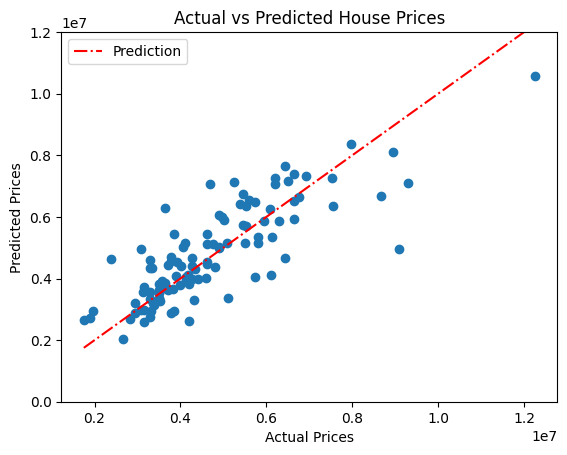

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
x_line = np.linspace(min(y_test),max(y_test),100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='-.', label='Prediction')
plt.ylim(0, 1.2e7)
plt.legend()
plt.show()

## Export model

In [12]:
import pickle
pickle.dump(model, open('ml_6610422024.sav','wb') )
from google.colab import files
files.download('ml_6610422024.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Finish